## Visualize images after data augmetaion

### import packages

In [80]:
import os
import random
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

### Transforms

In [81]:
image_size = 192
train_tfm = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomApply([   
        transforms.RandomApply([transforms.CenterCrop((160,160))], p=0.4),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomApply([transforms.RandomRotation(10, expand=False, center=None, fill=256)], p=0.35),
        transforms.RandomApply([transforms.Pad(10, fill=256, padding_mode='constant')], p=0.3),
        transforms.RandomApply([transforms.ColorJitter(brightness=0.2, contrast=0, saturation=0, hue=0)], p=1),
        transforms.RandomApply([transforms.ColorJitter(brightness=0, contrast=0.4, saturation=0, hue=0)], p=0.3),
        transforms.RandomApply([transforms.ColorJitter(brightness=0, contrast=0, saturation=0.4, hue=0)], p=0.3),
        # transforms.RandomApply([transforms.Pad(10, fill=256, padding_mode='constant')], p=0.3),
        # transforms.RandomAdjustSharpness(6, p=0.3),
        # transforms.RandomApply([transforms.ColorJitter(brightness=0.25)], p=0.4),
        # transforms.RandomApply([transforms.ColorJitter(contrast=0.3)], p=0.4),
        # transforms.RandomApply([transforms.ColorJitter(saturation=0.3)], p=0.4),
        # transforms.RandomApply([transforms.GaussianBlur(3, (0.5, 1.5))], p=0.15),
        # transforms.RandomPerspective(distortion_scale=0.5, fill=256, p=0.35),
    ],
    p=0.98),
    transforms.Resize((image_size, image_size)),  # Resize image to fixed shape
])

### Show single image

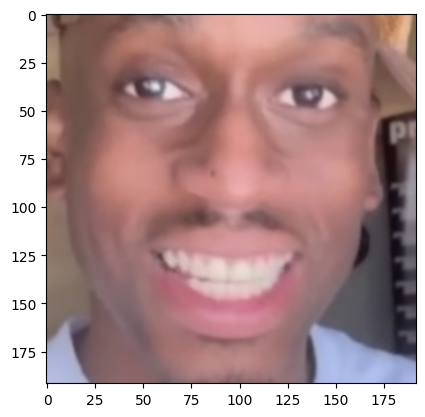

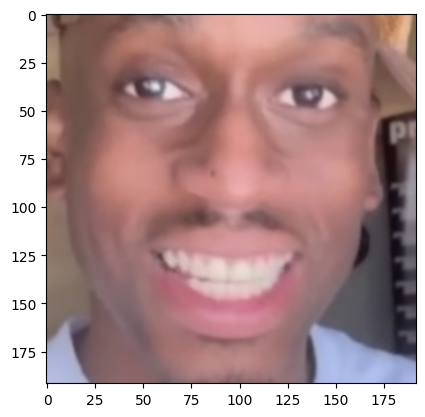

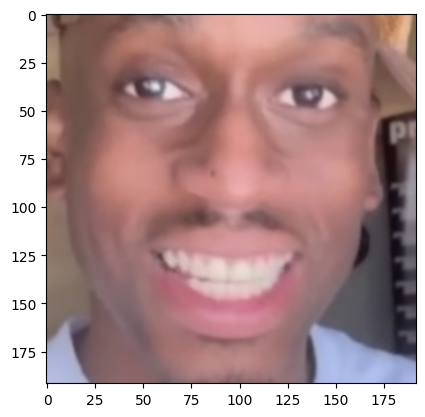

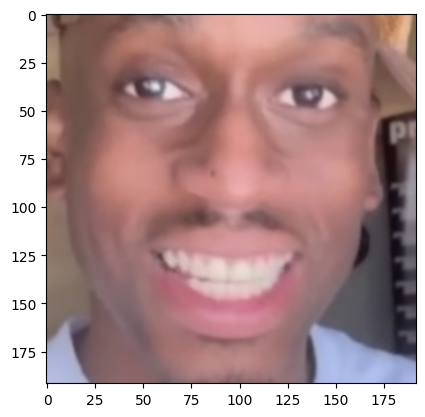

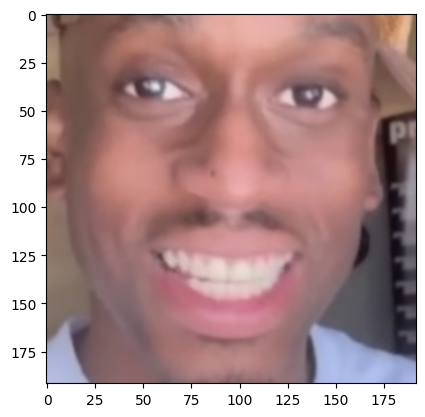

In [85]:
fname = "./preprocess/faces/1_video_001.jpg"
for i in range(5):
    image = Image.open(fname)
    image = train_tfm(image)
    plt.imshow(transforms.ToPILImage()(transforms.ToTensor()(image)), interpolation="bicubic")
    plt.show()

### Show diferent images

In [83]:
# data directory
_dataset_dir = ""

# ==================== #
# NEED TO FIX THE PATH #
# ==================== #
# get image names 
path = os.path.join(_dataset_dir,"training")
files = sorted([os.path.join(path,x) for x in os.listdir(path) if x.endswith(".jpg")])
random.seed(8888)
random.shuffle(files)

# number of images to show
num_to_show = 5

### show different images
for i in range(num_to_show):
    fname = files[i]
    print(fname)
    image = Image.open(fname)
    image = train_tfm(image)
    plt.imshow(transforms.ToPILImage()(transforms.ToTensor()(image)), interpolation="bicubic")
    plt.show()

FileNotFoundError: [WinError 3] 系統找不到指定的路徑。: 'training'